In [1]:
import pandas as pd
train_set = pd.read_csv("NYPD_7_Major_Felony_Incidents_train.csv")
test_set = pd.read_csv("NYPD_7_Major_Felony_Incidents_test.csv")
train_set.head()

,Identifier,Occurrence Datetime,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1,Occurrence Date
0,4eaf2b62,02/13/2013 12:00:00 AM,Wednesday,Feb,13,2013,0,2,14,2013,GRAND LARCENY,H,13,MANHATTAN,N.Y. POLICE DEPT,985716,209911,"(40.7428419120001, -73.9947109889999)",2013-02-13
1,cacec67c,02/13/2013 12:00:00 AM,Wednesday,Feb,13,2013,0,5,20,2013,GRAND LARCENY,I,52,BRONX,N.Y. POLICE DEPT,1016552,260706,"(40.88220104, -73.88318653)",2013-02-13
2,ca4bc93e,02/13/2013 12:01:00 AM,Wednesday,Feb,13,2013,0,2,13,2013,FELONY ASSAULT,A,100,QUEENS,N.Y. POLICE DEPT,1041165,155066,"(40.592122008, -73.795071599)",2013-02-13
3,19f9636c,02/13/2013 12:05:00 AM,Wednesday,Feb,13,2013,0,2,13,2013,FELONY ASSAULT,H,62,BROOKLYN,N.Y. POLICE DEPT,984298,163775,"(40.61620917, -73.999828549)",2013-02-13
4,629302ce,02/13/2013 12:05:00 AM,Wednesday,Feb,13,2013,0,2,13,2013,FELONY ASSAULT,D,52,BRONX,N.Y. POLICE DEPT,1013228,253750,"(40.863120505, -73.8952373069999)",2013-02-13


I first drop the redundant data, such as:
- Location 1, which includes Lattitude and Longitude, the same information than X, Y coordinates.
- Occurrence Datetime and Occurrence Date give the same information like hours, days, months, years.

I also drop "Identifier" because it doesn't give any information that I can use to train a ML model.

In [2]:
train_set_clean = train_set.drop(["Occurrence Datetime", "Location 1",  "Occurrence Date","Identifier"], axis=1)
test_set_clean = test_set.drop(["Occurrence Datetime", "Location 1",  "Occurrence Date","Identifier"], axis=1)
train_set_clean.head()

,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate
0,Wednesday,Feb,13,2013,0,2,14,2013,GRAND LARCENY,H,13,MANHATTAN,N.Y. POLICE DEPT,985716,209911
1,Wednesday,Feb,13,2013,0,5,20,2013,GRAND LARCENY,I,52,BRONX,N.Y. POLICE DEPT,1016552,260706
2,Wednesday,Feb,13,2013,0,2,13,2013,FELONY ASSAULT,A,100,QUEENS,N.Y. POLICE DEPT,1041165,155066
3,Wednesday,Feb,13,2013,0,2,13,2013,FELONY ASSAULT,H,62,BROOKLYN,N.Y. POLICE DEPT,984298,163775
4,Wednesday,Feb,13,2013,0,2,13,2013,FELONY ASSAULT,D,52,BRONX,N.Y. POLICE DEPT,1013228,253750


In the following part, I encode the features containing string values, to be readable by ML tools.

- I decide to manually name the Day of Week in the "classical order" (Monday =1, Tuesday =2, etc.) because it is more readable for a human. I process the same for the Month.

- Otherwise, I used the Pandas factorize function and shifted the different features by an integer (1,100,200,300) to better read them.

In [3]:
train_set_clean["Day of Week"] = train_set_clean["Day of Week"].map({"Monday": 1, "Tuesday": 2,"Wednesday": 3,"Thursday": 4,"Friday": 5,"Saturday": 6, "Sunday":7})
test_set_clean["Day of Week"] = test_set_clean["Day of Week"].map({"Monday": 1, "Tuesday": 2,"Wednesday": 3,"Thursday": 4,"Friday": 5,"Saturday": 6, "Sunday":7})

train_set_clean["Occurrence Month"] = train_set_clean["Occurrence Month"].map({"Jan": 1, "Feb": 2,"Mar": 3,"Apr": 4,"May": 5,"Jun": 6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12})
test_set_clean["Occurrence Month"] = test_set_clean["Occurrence Month"].map({"Jan": 1, "Feb": 2,"Mar": 3,"Apr": 4,"May": 5,"Jun": 6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12})

#train_set_clean["Offense"]= (pd.factorize(train_set_clean["Offense"])[0]+100)
#test_set_clean["Offense"] = (pd.factorize(test_set_clean["Offense"])[0]+100)

train_set_clean["Sector"]= (pd.factorize(train_set_clean["Sector"])[0]+1)
test_set_clean["Sector"] = (pd.factorize(test_set_clean["Sector"])[0]+1)

train_set_clean["Borough"]= (pd.factorize(train_set_clean["Borough"])[0]+200)
test_set_clean["Borough"] = (pd.factorize(test_set_clean["Borough"])[0]+200)

train_set_clean["Jurisdiction"]= (pd.factorize(train_set_clean["Jurisdiction"])[0]+300)
test_set_clean["Jurisdiction"] = (pd.factorize(test_set_clean["Jurisdiction"])[0]+300)

train_set_clean.head()

,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate
0,3,2,13,2013,0,2,14,2013,GRAND LARCENY,1,13,200,300,985716,209911
1,3,2,13,2013,0,5,20,2013,GRAND LARCENY,2,52,201,300,1016552,260706
2,3,2,13,2013,0,2,13,2013,FELONY ASSAULT,3,100,202,300,1041165,155066
3,3,2,13,2013,0,2,13,2013,FELONY ASSAULT,1,62,203,300,984298,163775
4,3,2,13,2013,0,2,13,2013,FELONY ASSAULT,4,52,201,300,1013228,253750


Creation of a dummy model that returns "Grand Larceny." I use the DummyClassifier class from Scikit-Learn.

In [4]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(train_set, train_set["Offense"])
#dummy.predict(train_set)
dummy.predict(test_set)

from sklearn.metrics import accuracy_score
dum_acc = accuracy_score(test_set['Offense'].values, dummy.predict(test_set))
print("Dummy Model Accuracy = ",dum_acc)

Dummy Model Accuracy =  0.4056004532848239


I train a RandomForestRegressor and fit it on the test data set, then calculate the accuracy.
The importance will tell me how the algorithm uses the features.
Depending on the importance's scores, I will decide if I can delete useless features and improve the prediction accuracy.


Feature: 0, Score: 0.06252
Feature: 1, Score: 0.06376
Feature: 2, Score: 0.09494
Feature: 3, Score: 0.01681
Feature: 4, Score: 0.09903
Feature: 5, Score: 0.06393
Feature: 6, Score: 0.09653
Feature: 7, Score: 0.02089
Feature: 8, Score: 0.07675
Feature: 9, Score: 0.06840
Feature: 10, Score: 0.01021
Feature: 11, Score: 0.01209
Feature: 12, Score: 0.15806
Feature: 13, Score: 0.15607


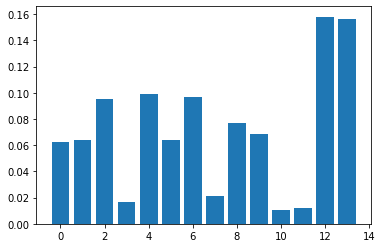

Accuracy =  0.40775753238103757


In [5]:
from sklearn.ensemble import RandomForestClassifier
train_set_prepared = train_set_clean.drop(['Offense'], axis = 1)

forest_reg = RandomForestClassifier(class_weight = "balanced")

forest_reg.fit(train_set_prepared, train_set_clean['Offense'])

importance = forest_reg.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

import matplotlib.pyplot as plt 
plt.bar([x for x in range(len(importance))], importance)
plt.show()




import numpy as np
test_set_prepared = test_set_clean.drop(['Offense'], axis = 1)
predictions = forest_reg.predict(test_set_prepared)

accuracy = accuracy_score(predictions,list(test_set_clean["Offense"].values))
print("Accuracy = ",accuracy)

In [6]:
train_set_clean2 = train_set_clean.drop(["Sector","Precinct","Day of Week","Occurrence Month","CompStat Month","Borough","Occurrence Year","CompStat Year", "Jurisdiction"], axis=1)
test_set_clean2 = test_set_clean.drop(["Sector","Precinct","Day of Week","Occurrence Month","CompStat Month", "Borough","Occurrence Year","CompStat Year", "Jurisdiction"], axis=1)
train_set_clean2.head()

,Occurrence Day,Occurrence Hour,CompStat Day,Offense,XCoordinate,YCoordinate
0,13,0,14,GRAND LARCENY,985716,209911
1,13,0,20,GRAND LARCENY,1016552,260706
2,13,0,13,FELONY ASSAULT,1041165,155066
3,13,0,13,FELONY ASSAULT,984298,163775
4,13,0,13,FELONY ASSAULT,1013228,253750


Feature: 0, Score: 0.13378
Feature: 1, Score: 0.12549
Feature: 2, Score: 0.13498
Feature: 3, Score: 0.30304
Feature: 4, Score: 0.30270


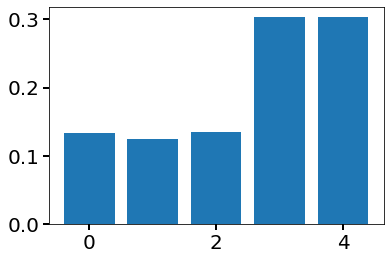

Accuracy =  0.44104812175071323


In [7]:
train_set_prepared2 = train_set_clean2.drop(['Offense'], axis = 1)

forest_reg2 = RandomForestClassifier(class_weight="balanced",bootstrap = True, criterion = "entropy")

forest_reg2.fit(train_set_prepared2, train_set_clean2['Offense'])


importance2 = forest_reg2.feature_importances_

for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))

import matplotlib.pyplot as plt 
plt.bar([x for x in range(len(importance2))], importance2)
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize = 20)
plt.show()


import numpy as np
test_set_prepared2 = test_set_clean2.drop(['Offense'], axis = 1)
predictions2 = forest_reg2.predict(test_set_prepared2)

accuracy2 = accuracy_score(predictions2,list(test_set_clean2["Offense"].values))
print("Accuracy = ",accuracy2)

Text(0.5, 0, ' Days of the month')

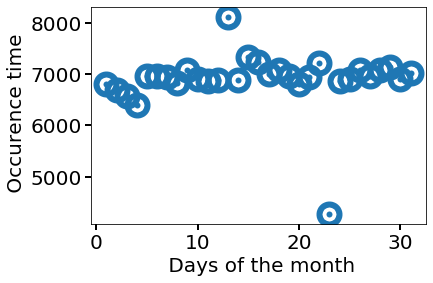

In [13]:
train_set['Occurrence Day'].value_counts().std()

plt.scatter(pd.unique(train_set['Occurrence Day']),train_set['Occurrence Day'].value_counts(),linewidths = 20)
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize = 20)
plt.ylabel(r' Occurence time', fontsize = 20)
plt.xlabel(r' Days of the month', fontsize = 20)

It seems that the plot shows a small weekly period. I compute a periodogram in order to verify this statement.

Text(0.5, 0, ' Period [day]')

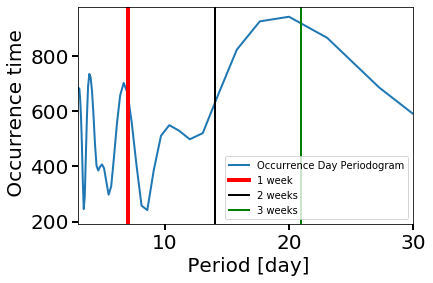

In [17]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(pd.unique(train_set['Occurrence Day']),train_set['Occurrence Day'].value_counts()).autopower(nyquist_factor=2,normalization='psd')
plt.plot(1/frequency,np.sqrt(power),label='Occurrence Day Periodogram',lw=2)
plt.axvline(7, 0, 1 ,label = "1 week",color = 'red',ls ='-',lw=4) 
plt.axvline(14, 0, 1 ,label = "2 weeks",color = 'black',ls ='-',lw=2) 
plt.axvline(21, 0, 1 ,label = "3 weeks",color = 'green',ls ='-',lw=2) 
plt.xlim(3,30)
plt.legend(fontsize = 10)
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize = 20)
plt.ylabel(r' Occurrence time', fontsize = 20)
plt.xlabel(r' Period [day]', fontsize = 20)

I found a period at 7 days, implying a seasonality in the data.